## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import time

## Loading file path

In [2]:
filepath = "D:\\CYBER ATTACK DETECTION PROJECT\\DATASET\\Final Dataset for comparision.csv"

In [3]:
# Loading the dataset

df = pd.read_csv(filepath, nrows=6000000)

In [4]:
df.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,misses_bytes,conn_state_encoded,proto_encoded
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,-1.0,6,1
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,6,1


In [5]:
# information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   duration            float64
 1   orig_bytes          int64  
 2   resp_bytes          int64  
 3   missed_bytes        float64
 4   orig_pkts           float64
 5   orig_ip_bytes       float64
 6   resp_pkts           float64
 7   resp_ip_bytes       float64
 8   label               object 
 9   misses_bytes        float64
 10  conn_state_encoded  int64  
 11  proto_encoded       int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 549.3+ MB


In [6]:
# statistical measures on dataset

df.describe()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,misses_bytes,conn_state_encoded,proto_encoded
count,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06
mean,3.205083e-01,1.379511e+01,4.815826e+00,2.038167e-03,1.482354e+00,8.451842e+01,5.231450e-02,7.444531e+00,-9.879377e-01,5.977283e+00,1.065920e+00
std,5.515918e+01,3.086522e+04,4.768798e+03,4.333402e+00,1.316062e+01,3.107951e+04,7.986297e+00,4.949354e+03,6.368391e+00,5.540468e-01,2.608366e-01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,6.000000e+00,1.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,6.000000e+00,1.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,6.000000e+00,1.000000e+00
max,9.328003e+04,7.554662e+07,1.166102e+07,5.390000e+03,1.844400e+04,7.606306e+07,9.307000e+03,1.207699e+07,5.792000e+03,1.200000e+01,2.000000e+00


In [7]:
df.shape

(6000000, 12)

In [8]:
df.columns

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes',
       'conn_state_encoded', 'proto_encoded'],
      dtype='object')

In [9]:
df.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,misses_bytes,conn_state_encoded,proto_encoded
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,-1.0,6,1
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,6,1


In [10]:
df['label'].value_counts()

PartOfAHorizontalPortScan    2718724
Benign                       1504224
Okiru                        1498723
DDoS                          264132
C&C                             6839
Attack                          5969
C&C-HeartBeat                   1345
C&C-Torii                         30
C&C-FileDownload                  11
Okiru-Attack                       3
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

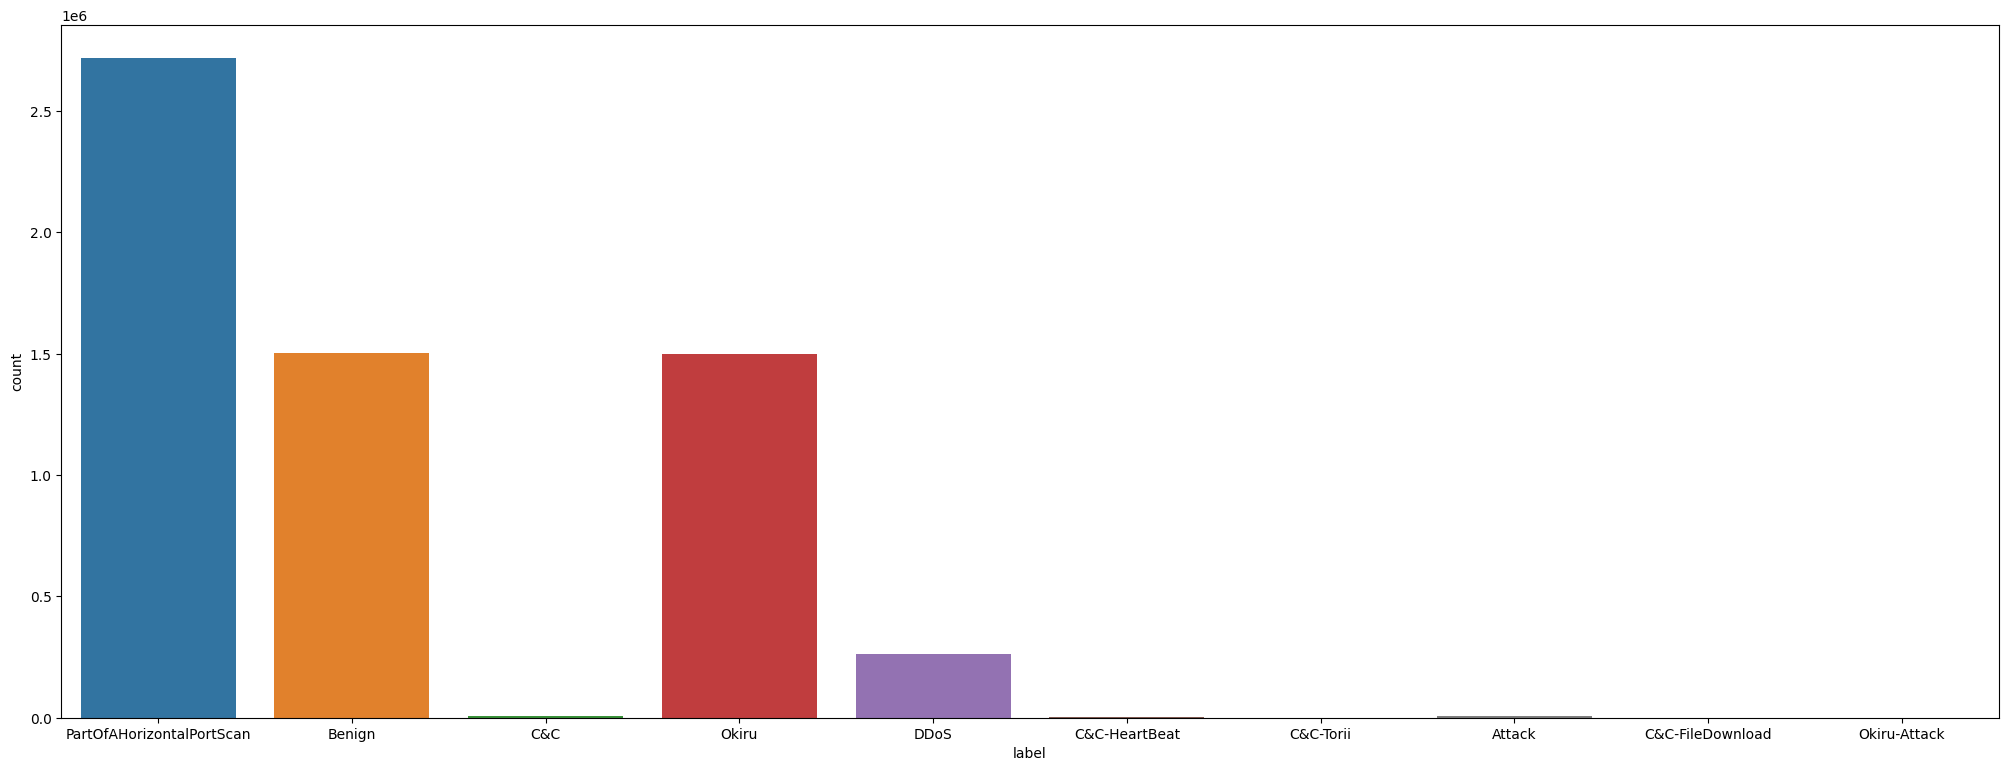

In [11]:
plt.figure(figsize = (25,9))
sns.countplot(x = df['label'])

In [12]:
df['label'] = df['label'].replace(['PartOfAHorizontalPortScan','Okiru','Okiru-Attack','DDoS','C&C','Attack','C&C-HeartBeat','C&C-FileDownload','C&C-Torii','FileDownload','C&C-HeartBeat-FileDownload','C&C-Mirai'], 'Malignant')
df['label'].value_counts()

Malignant    4495776
Benign       1504224
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

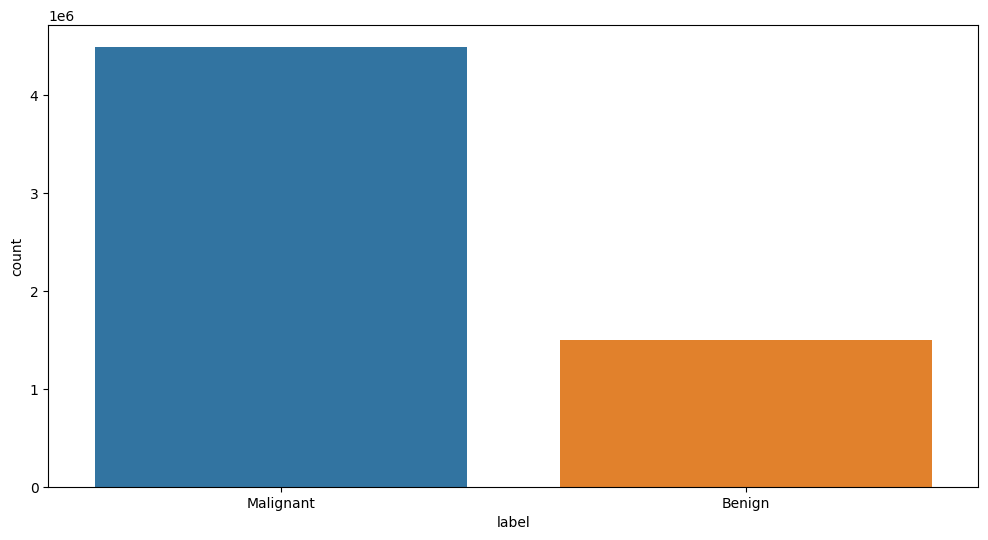

In [13]:
plt.figure(figsize = (12,6))
sns.countplot(x = df['label'])

In [14]:
df.columns = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes','proto_encoded', 'conn_state_encoded']

In [15]:
for col in df.columns:
    print(col)

duration
orig_bytes
resp_bytes
missed_bytes
orig_pkts
orig_ip_bytes
resp_pkts
resp_ip_bytes
label
misses_bytes
proto_encoded
conn_state_encoded


In [16]:
print(df.columns.tolist())

['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes', 'proto_encoded', 'conn_state_encoded']


In [17]:
df['label'].value_counts()

Malignant    4495776
Benign       1504224
Name: label, dtype: int64

## Changing the labels into numerical columns

In [18]:
df['label'].head()

0    Malignant
1    Malignant
2    Malignant
3       Benign
4       Benign
Name: label, dtype: object

In [19]:
# Creating a instance of lable Encoder

le = LabelEncoder()


label = le.fit_transform(df['label'])

label

array([1, 1, 1, ..., 1, 1, 1])

In [20]:
df.drop("label", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'Purchased'
df["label"] = label

# printing Dataframe
df.head()


,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,misses_bytes,proto_encoded,conn_state_encoded,label
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,-1.0,6,1,1
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,-1.0,6,1,1
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,-1.0,6,1,1
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,-1.0,6,1,0
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,-1.0,6,1,0


In [21]:
df['label'].value_counts()

1    4495776
0    1504224
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

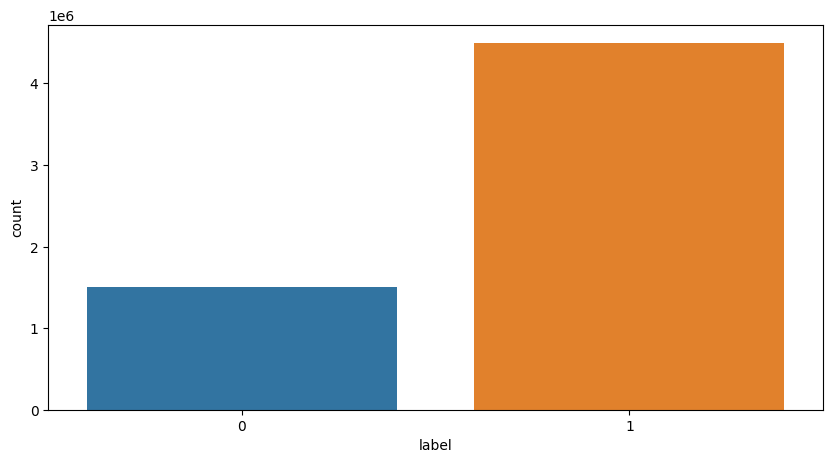

In [22]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['label'])

## Splitting the dataset into features and target

In [23]:
# features
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',   'misses_bytes', 'proto_encoded', 'conn_state_encoded']]

# target
Y = df['label']

In [24]:
# shape of feature and target

print('Shape of feature : ',X.shape)
print('Shape of target : ',Y.shape)

Shape of feature :  (6000000, 11)
Shape of target :  (6000000,)


In [25]:
scaler = StandardScaler()

scaler.fit(X)
X_standard = scaler.transform(X)

In [26]:
print(X_standard)

[[ 0.04855561 -0.00044695 -0.00100986 ... -0.00189409  0.04100226
  -0.25272461]
 [-0.00581061 -0.00044695 -0.00100986 ... -0.00189409  0.04100226
  -0.25272461]
 [-0.00581061 -0.00044695 -0.00100986 ... -0.00189409  0.04100226
  -0.25272461]
 ...
 [-0.00581061 -0.00044695 -0.00100986 ... -0.00189409  0.04100226
  -0.25272461]
 [-0.00581061 -0.00044695 -0.00100986 ... -0.00189409  0.04100226
  -0.25272461]
 [-0.00581061 -0.00044695 -0.00100986 ... -0.00189409  0.04100226
  -0.25272461]]


## Splitting the dataset into features and target

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Training Random Forest Model

In [28]:
start = time.time()
rf = RandomForestClassifier()

# Fit the Random Forest model on the training data
rf.fit(X_train, Y_train)

# Make predictions on the test data
rf_pred = rf.predict(X_test)

# Calculate the accuracy, F1 score, recall, and precision of the Random Forest model
rf_acc = accuracy_score(Y_test, rf_pred)
rf_f1 = f1_score(Y_test, rf_pred, average='macro', zero_division=1)
rf_recall = recall_score(Y_test, rf_pred, average='macro', zero_division=1)
rf_precision = precision_score(Y_test, rf_pred, average='macro', zero_division=1)
end = time.time()

rf_time = end - start 

In [29]:
print('Random Forest Accuracy : ',rf_acc)
print('Random Forest F1 Score : ',rf_f1)
print('Random Forest Recall : ',rf_recall)
print('Random Forest Precision : ',rf_precision)
print('Random Forest Time : ',rf_time)

Random Forest Accuracy :  0.9226416666666667
Random Forest F1 Score :  0.9045742027230155
Random Forest Recall :  0.9391593525186543
Random Forest Precision :  0.8828758943962978
Random Forest Time :  248.2704155445099


## Printing Classification Report

In [30]:
print('Random Forest Classifier : ')
print(classification_report(Y_test, rf_pred, zero_division=1))

Random Forest Classifier : 
              precision    recall  f1-score   support

           0       0.78      0.97      0.86    300846
           1       0.99      0.91      0.95    899154

    accuracy                           0.92   1200000
   macro avg       0.88      0.94      0.90   1200000
weighted avg       0.94      0.92      0.93   1200000



## Making a Predicition System

In [31]:
df.columns

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'misses_bytes',
       'proto_encoded', 'conn_state_encoded', 'label'],
      dtype='object')

In [33]:
input_data = (-1,-1,-1,	0,2,80,0,0,-1,6,1)

# changing data to numpy array 
input_data_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped =  input_data_array.reshape(1,-1)


# standarize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)


result = rf.predict(std_data)
print("The prediction is : ",result)

if (result[0] == 0):
  print("No Attack has been found.")
else:
  print("Attack has been found")

[[-2.39399577e-02 -4.79345683e-04 -1.21955806e-03 -4.70338699e-04
   3.93329538e-02 -1.45382657e-04 -6.55053367e-03 -1.50414209e-03
  -1.89409444e-03  4.10022585e-02 -2.52724611e-01]]
The prediction is :  [1]
Attack has been found


C:\Users\aksha\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\aksha\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [34]:
import pickle 
# importing the library

filename = "trained_model.pkl"
pickle.dump(rf, open(filename, 'wb'))
# saving file

## Making Y_train and rf_pred same number of sample

In [35]:
print(Y_train.shape)
print(rf_pred.shape)

(4800000,)
(1200000,)


In [36]:
Y_train = Y_train[:rf_pred.shape[0]]

In [37]:
print(Y_train.shape)
print(rf_pred.shape)

(1200000,)
(1200000,)


## Confusion Matrix

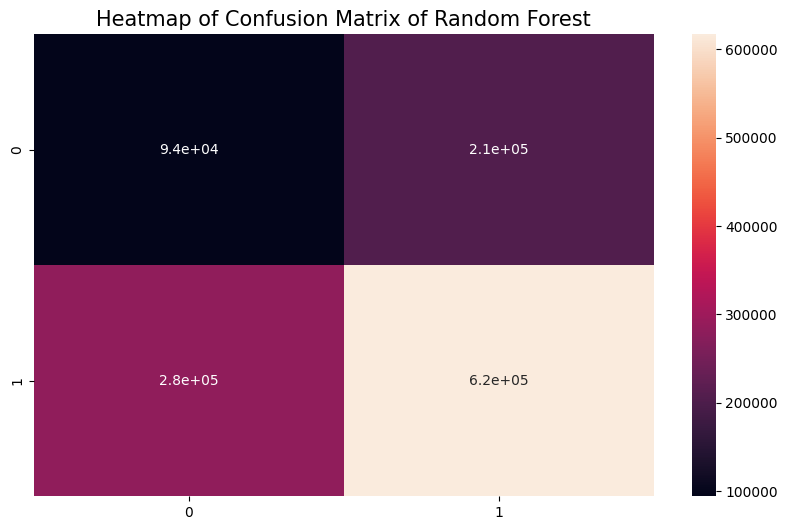

In [38]:
plt.figure(figsize = (10,6))
cm = confusion_matrix(Y_train, rf_pred)
plt.title('Heatmap of Confusion Matrix of Random Forest', fontsize = 15)
sns.heatmap(cm, annot= True)
plt.show()